In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
import scipy.optimize as opt

In [3]:
#data = pd.read_csv (r'C:\Users\JOANA\Desktop\Project\Project\covid19Bulgaria2.csv')  
data = pd.read_csv (r'C:\Users\JOANA\Desktop\Project\Project\covid19Bulgaria.csv')  
#print(data)
data

date  confirmed  infected  deaths  recovered  new  new deaths  \
0   08-03-2020          4         4       0          0    4           0   
1   09-03-2020          4         4       0          0    0           0   
2   10-03-2020          6         6       0          0    2           0   
3   11-03-2020          7         6       1          0    1           1   
4   12-03-2020         23        22       1          0   16           0   
5   13-03-2020         31        30       1          0    8           0   
6   14-03-2020         41        39       2          0   10           1   
7   15-03-2020         51        49       2          0   10           0   
8   16-03-2020         62        60       2          0   11           0   
9   17-03-2020         81        79       2          0   19           0   
10  18-03-2020         92        90       2          0   11           0   
11  19-03-2020        107       104       3          0   15           1   
12  20-03-2020        127       123       3          1   20           0   
13  21-03-2020        163       157       3          3   36           0   
14  22-03-2020        187       181       3          3   24           0   
15  23-03-2020        201       195       3          3   14           0   
16  24-03-2020        218       212       3          3   17           0   
17  25-03-2020        242       235       3          4   24           0   
18  26-03-2020        264       253       3          8   22           0   
19  27-03-2020        293       281       3          9   29           0   
20  28-03-2020        331       313       7         11   38           4   
21  29-03-2020        346       324       8         14   15           1   
22  30-03-2020        359       334       8         17   13           0   
23  31-03-2020        399       374       8         17   40           0   
24  01-04-2020        422       392      10         20   23           2   
25  02-04-2020        457       422      10         25   35           0   
26  03-04-2020        485       441      14         30   28           4   
27  04-04-2020        503       452      17         34   18           3   
28  05-04-2020        531       474      20         37   28           3   
29  06-04-2020        549       488      22         39   18           2   
30  07-04-2020        577       512      23         42   28           1   
31  08-04-2020        593       527      24         42   16           1   
32  09-04-2020        618       546      24         48   25           0   
33  10-04-2020        635       556      25         54   17           1   
34  11-04-2020        661       571      28         62   26           3   
35  12-04-2020        675       578      29         68   14           1   
36  13-04-2020        685       582      32         71   10           3   
37  14-04-2020        713       597      35         81   28           3   
38  15-04-2020        747       606      36        105   34           1   
39  16-04-2020        800       640      38        122   53           2   
40  17-04-2020        846       664      41        141   46           3   
41  18-04-2020        878       671      41        153   32           0   
42  19-04-2020        894       691      42        161   16           1   

    new recovered  
0               0  
1               0  
2               0  
3               0  
4               0  
5               0  
6               0  
7               0  
8               0  
9               0  
10              0  
11              0  
12              1  
13              2  
14              0  
15              0  
16              0  
17              1  
18              4  
19              1  
20              2  
21              3  
22              3  
23              0  
24              3  
25              5  
26              5  
27              4  
28              3  
29              2  
30              3  
31              0  
32              6  
33              6  
34       

In [4]:
df = pd.DataFrame(data, columns= ['date','confirmed','infected','deaths','recovered','new','new deaths','new recovered'])
df
#print(df)

date  confirmed  infected  deaths  recovered  new  new deaths  \
0   08-03-2020          4         4       0          0    4           0   
1   09-03-2020          4         4       0          0    0           0   
2   10-03-2020          6         6       0          0    2           0   
3   11-03-2020          7         6       1          0    1           1   
4   12-03-2020         23        22       1          0   16           0   
5   13-03-2020         31        30       1          0    8           0   
6   14-03-2020         41        39       2          0   10           1   
7   15-03-2020         51        49       2          0   10           0   
8   16-03-2020         62        60       2          0   11           0   
9   17-03-2020         81        79       2          0   19           0   
10  18-03-2020         92        90       2          0   11           0   
11  19-03-2020        107       104       3          0   15           1   
12  20-03-2020        127       123       3          1   20           0   
13  21-03-2020        163       157       3          3   36           0   
14  22-03-2020        187       181       3          3   24           0   
15  23-03-2020        201       195       3          3   14           0   
16  24-03-2020        218       212       3          3   17           0   
17  25-03-2020        242       235       3          4   24           0   
18  26-03-2020        264       253       3          8   22           0   
19  27-03-2020        293       281       3          9   29           0   
20  28-03-2020        331       313       7         11   38           4   
21  29-03-2020        346       324       8         14   15           1   
22  30-03-2020        359       334       8         17   13           0   
23  31-03-2020        399       374       8         17   40           0   
24  01-04-2020        422       392      10         20   23           2   
25  02-04-2020        457       422      10         25   35           0   
26  03-04-2020        485       441      14         30   28           4   
27  04-04-2020        503       452      17         34   18           3   
28  05-04-2020        531       474      20         37   28           3   
29  06-04-2020        549       488      22         39   18           2   
30  07-04-2020        577       512      23         42   28           1   
31  08-04-2020        593       527      24         42   16           1   
32  09-04-2020        618       546      24         48   25           0   
33  10-04-2020        635       556      25         54   17           1   
34  11-04-2020        661       571      28         62   26           3   
35  12-04-2020        675       578      29         68   14           1   
36  13-04-2020        685       582      32         71   10           3   
37  14-04-2020        713       597      35         81   28           3   
38  15-04-2020        747       606      36        105   34           1   
39  16-04-2020        800       640      38        122   53           2   
40  17-04-2020        846       664      41        141   46           3   
41  18-04-2020        878       671      41        153   32           0   
42  19-04-2020        894       691      42        161   16           1   

    new recovered  
0               0  
1               0  
2               0  
3               0  
4               0  
5               0  
6               0  
7               0  
8               0  
9               0  
10              0  
11              0  
12              1  
13              2  
14              0  
15              0  
16              0  
17              1  
18              4  
19              1  
20              2  
21              3  
22              3  
23              0  
24              3  
25              5  
26              5  
27              4  
28              3  
29              2  
30              3  
31              0  
32              6  
33              6  
34       

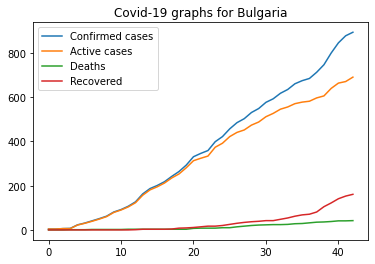

In [5]:
plt.plot(df['confirmed'], label = "Confirmed cases")
plt.plot(df['infected'], label = "Active cases")
#plt.plot(df['new'], label = "New cases")
plt.plot(df['deaths'], label = "Deaths")
plt.plot(df['recovered'], label = "Recovered")
plt.title("Covid-19 graphs for Bulgaria")
plt.legend()
plt.show()

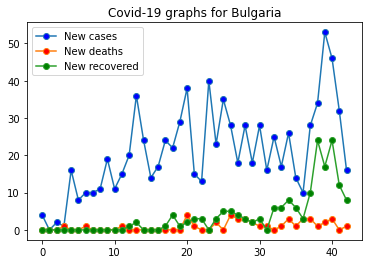

In [6]:
plt.plot(df['new'], label = "New cases",linestyle='solid',marker='o', markerfacecolor='blue')
plt.plot(df['new deaths'], label = "New deaths",linestyle='solid',marker='o', markerfacecolor='red')
plt.plot(df['new recovered'], label = "New recovered",linestyle='solid',marker='o', markerfacecolor='green')
plt.title("Covid-19 graphs for Bulgaria")
plt.legend()
plt.show()

In [7]:
reg = LinearRegression().fit([[el] for el in df.index], df['confirmed'])
#reg = LinearRegression().fit([[el] for el in df.index], df['deaths'])

In [8]:
df['prediction'] = reg.predict([[el] for el in df.index])

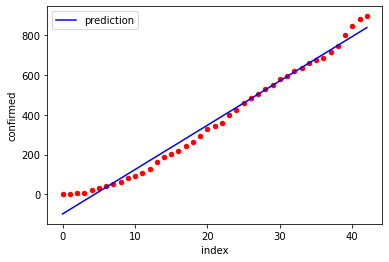

In [9]:
ax = plt.gca()
df.reset_index().plot(kind='scatter', x='index', y='confirmed', color='red', ax=ax)
#df.reset_index().plot(kind='scatter', x='index', y='deaths', color='red', ax=ax)
df.plot(kind='line', y='prediction', color='blue', ax=ax)
plt.show()

In [10]:
x_next_5 = list(range(max(df.index) + 1, max(df.index) + 6))
next_5 = reg.predict([[el] for el in x_next_5])

In [11]:
next_5

array([859.54817276, 881.80247659, 904.05678043, 926.31108426,
       948.5653881 ])

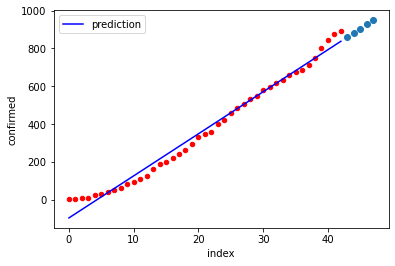

In [12]:
ax = plt.gca()
df.reset_index().plot(kind='scatter', x='index', y='confirmed', color='red', ax=ax)
#df.reset_index().plot(kind='scatter', x='index', y='deaths', color='red', ax=ax)
df.plot(kind='line', y='prediction', color='blue', ax=ax)
ax.scatter(x=x_next_5, y=next_5)
plt.show()

In [13]:
#Trying to fit a logistic function to my data
def f(x, a, b, c, d):
    return a / (1. + np.exp(-(x - d)/c)) + b

In [14]:
a, c = 0, 0 #np.random.exponential(size=2)
b, d = 0, 0 #np.random.randn(2)

In [15]:
n = len(df['confirmed'])
#n = len(df['deaths'])
x = list(range(n))
y = df['confirmed']
#y = df['deaths']

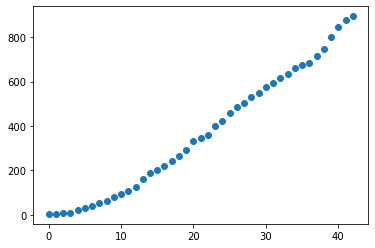

In [16]:
#plot of the data points 
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y, 'o')
plt.show()

In [17]:
#Obviously fitting a logistic function to the dataa points
(a_, b_, c_, d_), _ = opt.curve_fit(f, x, y)

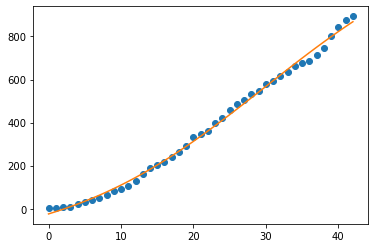

In [18]:
y_fit = f(x, a_, b_, c_, d_)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y, 'o')
ax.plot(x, y_fit, '-')
plt.show()

In [19]:
f([range(max(df.index) + 1, max(df.index) + 21)], a_, b_, c_, d_)

array([[ 890.44396202,  911.67397157,  932.22316811,  952.07501292,
         971.21742672,  989.64258634, 1007.34668399, 1024.32965694,
        1040.59489535, 1056.14893558, 1071.0011455 , 1085.16340824,
        1098.64980921, 1111.47633131, 1123.6605619 , 1135.2214144 ,
        1146.17886708, 1156.55372034, 1166.36737368, 1175.6416228 ]])

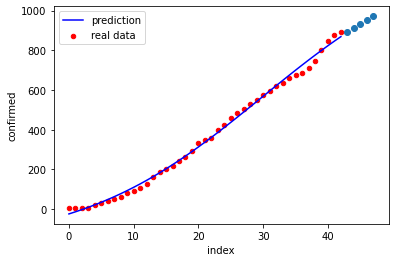

In [20]:
x_next_50 = list(range(max(df.index) + 1, max(df.index) + 6))
next_50 = f(x_next_50, a_, b_, c_, d_)
df['prediction'] = f([[el] for el in df.index], a_, b_, c_, d_)
ax = plt.gca()
#df.reset_index().plot(kind='scatter', x='index', y='confirmed', color='red', label = 'jj', ax=ax)
df.plot(kind='line', y='prediction', color='blue', ax=ax)
df.reset_index().plot(kind='scatter', x='index', y='confirmed', color='red', label = 'real data', ax=ax)
#df.reset_index().plot(kind='scatter', x='index', y='deaths', color='red', label = 'real data', ax=ax)
#scatter =
ax.scatter(x=x_next_50, y=next_50)
#legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
plt.show()

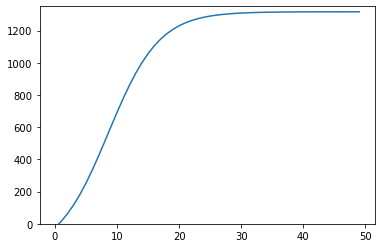

In [21]:
x = np.linspace(0,170)
plt.ylim(0,1350)
plt.plot(f(x,a_,b_,c_,d_,))
plt.show()

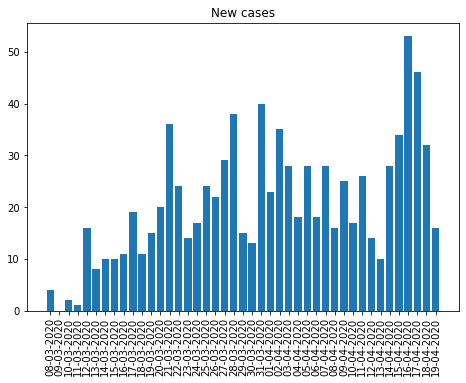

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
dates = list(df['date'])
newCases = list(df['new'])
ax.bar(dates, newCases)
ax.set_title('New cases')
plt.xticks(rotation = 'vertical')
plt.show()